# Projeto 1 - Ciência dos Dados

**DANIEL GURGEL TERRA**

## Pergunta (s) a ser respondida

Q1 : 'A ingressão dos países atualmente membros no grupo IEA (International Energy Agency) conseguiu contribuir com a diminuição das emissões de carbono?'

## Explicação da hipótese e mecanismo

A IEA tem como objetivo promover o desenvolvimento de energias renováveis, focando na redução das emissões de carbono causadas por energias não-renováveis tais como carbono e petróleo. Dessa forma é bem provável que países que ingressaram neste grupo tenham eventualmente e gradativamente reduzido suas emissões poluentes contribuindo para frear um aquecimento global.

>https://www.ipcc.ch/about/ >> Objetivos do IPCC

>https://www.iea.org/about/ >> Objetivos do IEA

>https://www.ipcc.ch/site/assets/uploads/2018/02/ipcc_wg3_ar5_full.pdf >> Gráficos; emissões de carbono (IPCC)

>https://www.epa.gov/ghgemissions/global-greenhouse-gas-emissions-data >> Gráficos; emissões de carbono (EPA)

## Bases de dados usadas

*EMISSÕES DE CARBONO [KiloTonelada]*
>https://data.worldbank.org/indicator/EN.ATM.CO2E.KT?contextual=default&end=2014&name_desc=false&start=1960&view=chart&year=1960

## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

## ARRUMANDO OS DADOS!

In [186]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

**ENERGIAS RENOVÁVEIS POR ANO**

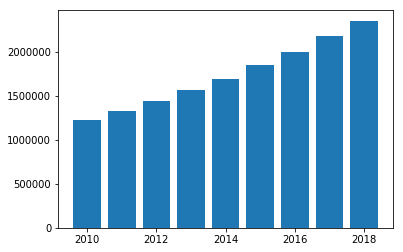

In [187]:
BIOENERGY  = [66929,73336,77867,84702,90625,96554,104788,109994,115731]
GEOTHERMAL = [9998,10088,10482,10731,11209,11856,12,12281,12789,13329]
HYDROPOWER = [925148,952609,982792,1027635,1064227,1097189,1126060,1150450,1171612]
MARINE     = [249.6,502.7,509.4,509.9,513.0,513.0,523.3,529.9,532.1]
SOLAR      = [40871,72683,102871,139602,177496,225820,297293,391063,485826]
WIND       = [180854,219984,266866,299941,349185,416225,467052,514622,563726]
Renewables_per_year = []
Tempo_R = []
for i in range(len(BIOENERGY)):
    Renewables_per_year.append(BIOENERGY[i]+GEOTHERMAL[i]+HYDROPOWER[i]+MARINE[i]+SOLAR[i]+WIND[i])
    Tempo_R.append(2010+i)
plt.bar(Tempo_R, Renewables_per_year);

In [188]:
Renewables = pd.DataFrame(Renewables_per_year, index=Tempo_R, columns=['ENERGIA']).T
Renewables

,2010,2011,2012,2013,2014,2015,2016,2017,2018
ENERGIA,1224049.6,1329202.7,1441387.4,1563120.9,1693255.0,1848157.0,1995728.3,2178939.9,2350216.1


**EMISSÕES DE CARBONO POR ANO**

In [189]:
dados = pd.read_excel("WB_CarbonEmissions.xls")
del dados['World Development Indicators']
del dados['Unnamed: 2']
del dados['Unnamed: 3']

dados = dados.drop([0,1])

anos = dados.iloc[0,1:]

for i in range(len(anos)):
    anos[i] = int(anos[i])
    
countries = dados.iloc[1:,0]

dados = dados.rename(columns = anos)

del dados['Data Source']
dados = dados.drop([2])

dados = dados.rename(index = countries)

Locais_ñ_países = ["Arab World", "Central Europe and the Baltics", 
                   "East Asia & Pacific (excluding high income)",
                   "Early-demographic dividend", "East Asia & Pacific",
                   "Europe & Central Asia (excluding high income)",
                   "Europe & Central Asia", "Euro area", "European Union",
                   "Fragile and conflict affected situations", "High income",
                   "Heavily indebted poor countries (HIPC)", "IBRD only",
                   "IDA & IBRD total", "IDA total", "IDA blend", "IDA only",
                   "Not classified", "Latin America & Caribbean", 
                   "Least developed countries: UN classification",
                   "Low income", "Lower middle income", "Low & middle income",
                   "Late-demographic dividend", "Middle East & North Africa",
                   "OECD members", "Pre-demographic dividend", 
                   "Post-demographic dividend", "Sub-Saharan Africa (excluding high income)",
                   "East Asia & Pacific (IDA & IBRD countries)", 
                   "Europe & Central Asia (IDA & IBRD countries)",
                   "Latin America & the Caribbean (IDA & IBRD countries)",
                   "Middle East & North Africa (IDA & IBRD countries)",
                   "South Asia (IDA & IBRD)","Sub-Saharan Africa (IDA & IBRD countries)",
                   "Upper middle income", "World", "Caribbean small states",
                   "Middle income", "Middle East & North Africa (excluding high income)",
                   "North America", "Other small states", "Pacific island small states",
                   "South Asia", "Sub-Saharan Africa", "Small states"]

World = dados.loc["World",:]
UK = dados.loc['United Kingdom',:]

dados = dados.T
for tag in Locais_ñ_países:
    del dados[tag]
dados = dados.T

^^ DADOS SEM OS NÃO PAÍSES, INDICES ARRUMADOS, POSIÇÃO CORRETA

In [190]:
IEA_paises = ['United States','United Kingdom','Turkey','Thailand','Switzerland','Sweden','Spain','Korea, Rep.','South Africa',
              'Slovak Republic','Russian Federation','Portugal','Poland','Norway','New Zealand','Netherlands','Morocco','Japan',
              'Italy','Indonesia','India','Hungary','Greece','Germany','France','Finland','Estonia','Denmark','Czech Republic',
              'China','Chile','Canada','Brazil','Belgium','Austria','Australia']
dados['IEA'] = ''
for i in range(len(dados.index)):
    if dados.index[i] in IEA_paises:
        dados.at[dados.index[i],'IEA'] = True
    else:
        dados.at[dados.index[i],'IEA'] = False

EMISSÕES: IEA PAÍSES MEMBROS :

In [191]:
Emissões_IEA = dados[dados.IEA == True]
Emissões_IEA = Emissões_IEA.dropna(axis=1)
Emissões_IEA = Emissões_IEA.dropna(axis=0)
Emissões_IEA = Emissões_IEA.iloc[:,:-1]
print(Emissões_IEA.size)
print(Emissões_IEA.shape)

828
(36, 23)


In [192]:
Tempo = Emissões_IEA.columns

EMISSÕES: NÃO MEMBROS :

In [193]:
Emissões_ñ_IEA = dados[dados.IEA == False]
    
Emissões_ñ_IEA = Emissões_ñ_IEA.loc[ : , Tempo ]
Emissões_ñ_IEA = Emissões_ñ_IEA.dropna(axis=0)
Emissões_ñ_IEA = Emissões_ñ_IEA.dropna(axis=1)
print(Emissões_ñ_IEA.size)
print(Emissões_ñ_IEA.shape)

3703
(161, 23)


EMISSÕES: GLOBAIS DE 1992 ATÉ 2014 (MEMBROS TEM DATA) :

In [194]:
Emissões = dados.loc[ : , Tempo]
Emissões = Emissões.dropna(axis=0)
Emissões = Emissões.dropna(axis=1)
print(Emissões.size)
print(Emissões.shape)

4531
(197, 23)


In [195]:
Emissões.head(25)

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Aruba,1463.133,1595.145,1613.480,1668.485,1690.487,1745.492,1796.830,1807.831,2379.883,2409.219,...,2720.914,2717.247,2823.590,2658.575,2629.239,2508.228,2500.894,1349.456,861.745,872.746
Afghanistan,1393.460,1345.789,1294.451,1243.113,1177.107,1096.433,1041.428,821.408,773.737,817.741,...,1327.454,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,10014.577,9809.225
Angola,5196.139,5775.525,3890.687,10975.331,10458.284,7381.671,7308.331,9156.499,9541.534,9732.218,...,19156.408,22266.024,25151.953,25709.337,27792.193,29057.308,30340.758,33399.036,32617.965,34763.160
Albania,2515.562,2335.879,1925.175,2086.523,2016.850,1543.807,1752.826,2984.938,3021.608,3223.293,...,4253.720,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4910.113,5064.127,5716.853
Andorra,407.037,410.704,407.037,425.372,454.708,465.709,491.378,513.380,524.381,524.381,...,575.719,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.710,462.042
United Arab Emirates,58136.618,65980.331,73130.981,70641.088,41059.399,41646.119,81495.408,78374.791,112562.232,101414.552,...,116148.558,123874.927,135627.662,157354.637,167959.601,160812.618,165440.372,176386.367,170706.184,211369.547
Argentina,121352.031,117927.053,122408.127,127963.632,135000.605,138003.878,139815.376,146984.361,142136.587,133720.822,...,162110.736,175436.614,175176.257,189107.190,179961.692,187919.082,191633.753,192356.152,189851.591,204024.546
Armenia,5826.863,2555.899,2706.246,3410.310,2563.233,3234.294,3362.639,3014.274,3465.315,3542.322,...,4352.729,4382.065,5064.127,5559.172,4360.063,4217.050,4917.447,5694.851,5496.833,5529.836
Antigua and Barbuda,264.024,271.358,267.691,275.025,293.360,308.028,319.029,330.030,344.698,348.365,...,429.039,443.707,469.376,480.377,509.713,524.381,513.380,524.381,524.381,531.715
Australia,267984.360,277397.549,278119.948,281860.288,302164.467,305794.797,316883.805,325343.574,329443.280,324844.862,...,350172.831,365346.877,372090.490,385904.079,394792.887,390861.863,391818.950,388126.281,372266.506,361261.839


## ANÁLISE

Média

In [196]:
Média_Emissões = Emissões.mean()
Média_ñ_IEA    = Emissões_ñ_IEA.mean()
Média_IEA      = Emissões_IEA.mean()

In [197]:
def TwoAxis(listax, labelx,  listay1, labely1, listay2, labely2, color1, color2):     
    fig, ax1 = plt.subplots()
    ax1.plot(listax, listay1, color1)
    ax1.set_xlabel(labelx)
    ax1.set_ylabel(labely1, color=color1)
    for tl in ax1.get_yticklabels():
        tl.set_color(color1)    
    ax2 = ax1.twinx()
    ax2.plot(listax, listay2, color2)
    ax2.set_ylabel(labely2, color=color2)
    for tl in ax2.get_yticklabels():
        tl.set_color(color2)

In [198]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

**Data de interesse**

World

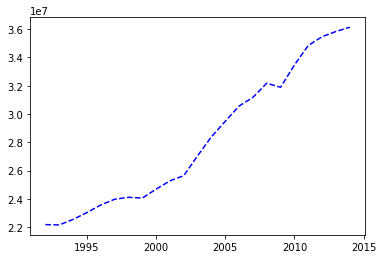

In [199]:
WD_Reference = (pd.DataFrame(World).T).loc[ :, list(Tempo) ]
y = WD_Reference.T['World']
plt.plot(y, 'b--')

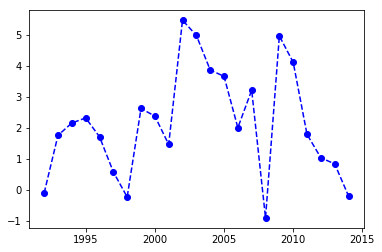

In [200]:
def CalculaVariação(y):
    lista = []
    for i in range(0,len(y)-1):
        lista.append( ( (y.iloc[i+1]/y.iloc[i]) -1 )*100)
    ext = lista[i] - lista[i-1]
    lista.append(ext)
    return lista
lista = CalculaVariação(y)
plt.plot(y.index,lista, 'b--o')

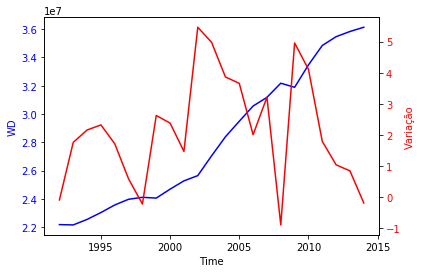

In [201]:
TwoAxis(y.index, 'Time', y,'WD', lista, 'Variação', 'b', 'r')

UK - Country

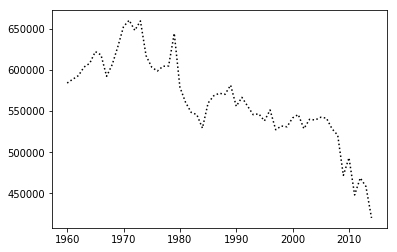

In [202]:
UK_Reference = (pd.DataFrame(UK).T).dropna(axis=1)
y = UK_Reference.T['United Kingdom']
plt.plot(y, 'k:')

RELACIONANDO DOIS FATORES (EMISSÕES, ENERGIA RENOVÁVEL)

In [203]:
Renewables

,2010,2011,2012,2013,2014,2015,2016,2017,2018
ENERGIA,1224049.6,1329202.7,1441387.4,1563120.9,1693255.0,1848157.0,1995728.3,2178939.9,2350216.1


In [204]:
WD_Reference

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
World,2.218342e+07,22162174.56,2.255169e+07,23037524.13,2.357156e+07,2.397501e+07,24114192.0,24059187.0,24689911.0,25276631.0,...,29490014.0,30568112.0,31180501.0,32181592.0,31891899.0,33472376.0,34847501.0,35470891.0,35837591.0,36138285.0


In [205]:
Variação_WD = pd.DataFrame(lista, index=WD_Reference.T.index, columns=['Delta_WD'])
Variação_WD.T

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Delta_WD,-0.09576,1.757572,2.154311,2.318099,1.7116,0.580541,-0.228102,2.621552,2.376355,1.465255,...,3.655807,2.003359,3.210632,-0.900182,4.955732,4.108238,1.788909,1.033805,0.839046,-0.194759


In [206]:
Variação_E = CalculaVariação(Renewables.T['ENERGIA'])
Variação_E = pd.DataFrame(Variação_E, index=Renewables.T.index, columns=['Delta_E'])
Variação_E.T

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Delta_E,8.590591,8.439999,8.445578,8.325274,9.148179,7.984782,9.180188,7.860529,-1.319659


In [207]:
time = []
for i in range(1992,2018):
    time.append(i)

In [208]:
Reference = pd.DataFrame(index=time)
Reference = Reference.join(Renewables.T, how='inner')
Reference = Reference.join(Variação_E, how='inner')
Reference = Reference.join(WD_Reference.T, how='inner')
Reference = Reference.join(Variação_WD, how='inner')
Reference

,ENERGIA,Delta_E,World,Delta_WD
2010,1224049.6,8.590591,33472376.0,4.108238
2011,1329202.7,8.439999,34847501.0,1.788909
2012,1441387.4,8.445578,35470891.0,1.033805
2013,1563120.9,8.325274,35837591.0,0.839046
2014,1693255.0,9.148179,36138285.0,-0.194759


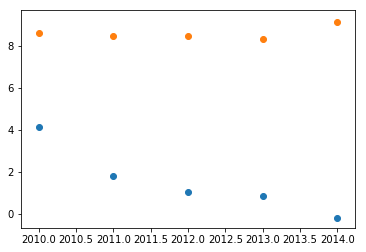

In [209]:
plt.scatter(Reference.index,Reference['Delta_WD'])
plt.scatter(Reference.index,Reference['Delta_E'])

Coeficiente linear: 54.67680442596633
Coeficiente angular: -1.5122822864639187e-06


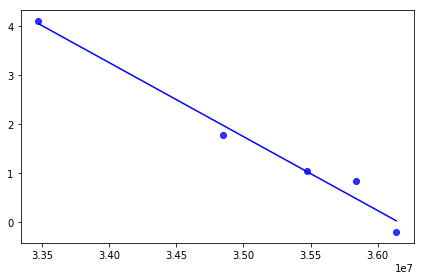

In [210]:
reta(Reference['World'],Reference['Delta_WD'],'b')

Coeficiente linear: 7.2726946240938855
Coeficiente angular: 9.083071268241237e-07


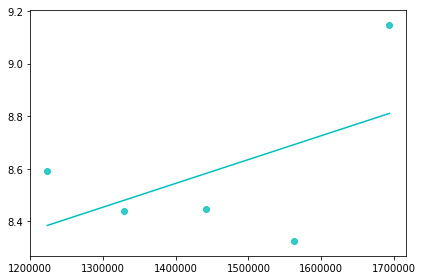

In [211]:
reta(Reference['ENERGIA'],Reference['Delta_E'],'c')

Coeficiente linear: 8.69840087898828
Coeficiente angular: -0.0715993339468536


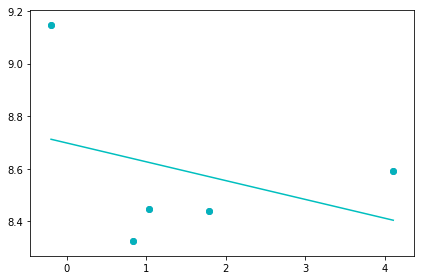

In [212]:
plt.scatter(Reference['Delta_WD'],Reference['Delta_E'])
reta(Reference['Delta_WD'],Reference['Delta_E'],'c')

**Iterações**

Média Global, Média IEA, Média ñ IEA (PLOT)

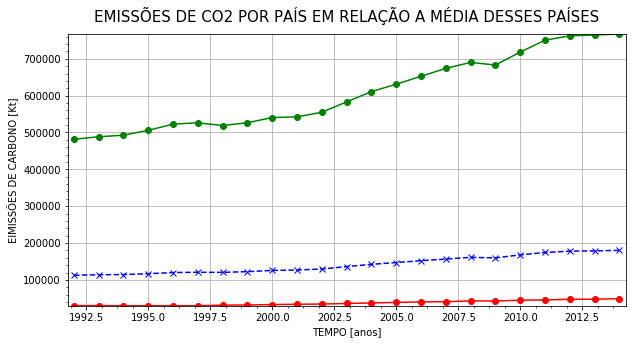

In [182]:
plt.figure(figsize=(10,5))
plt.autoscale(enable=True, axis='both', tight=True)

plt.title("EMISSÕES DE CO2 POR PAÍS EM RELAÇÃO A MÉDIA DESSES PAÍSES", fontsize=15, loc='center', pad=12);
plt.xlabel("TEMPO [anos]", fontsize=10);
plt.ylabel("EIMISSÕES DE CARBONO [Kt]", fontsize=10);

plt.plot(Tempo, Média_Emissões , "b--x")
plt.plot(Tempo, Média_ñ_IEA , "r-o")
plt.plot(Tempo, Média_IEA , "g-o")

plt.xlim(1991.75, 2014.25)
plt.minorticks_on()
plt.grid(True)

Média Global (PLOT) & SCATTER

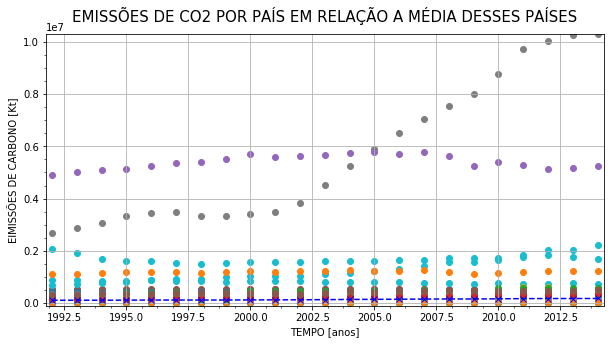

In [183]:
plt.figure(figsize=(10,5))
plt.autoscale(enable=True, axis='both', tight=True)

plt.title("EMISSÕES DE CO2 POR PAÍS EM RELAÇÃO A MÉDIA DESSES PAÍSES", fontsize=15, loc='center', pad=12);
plt.xlabel("TEMPO [anos]", fontsize=10);
plt.ylabel("EIMISSÕES DE CARBONO [Kt]", fontsize=10);

plt.plot(Tempo, Média_Emissões , "b--x")

Emissões_IEAT = Emissões_IEA.T
for pais in Emissões_IEAT.columns:
    plt.scatter(x=Emissões_IEAT.index, y=Emissões_IEAT[pais]);

plt.xlim(1991.75, 2014.25)
plt.minorticks_on()
plt.grid(True)

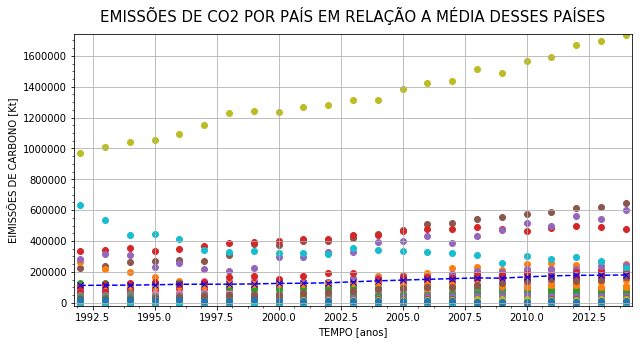

In [184]:
plt.figure(figsize=(10,5))
plt.autoscale(enable=True, axis='both', tight=True)

plt.title("EMISSÕES DE CO2 POR PAÍS EM RELAÇÃO A MÉDIA DESSES PAÍSES", fontsize=15, loc='center', pad=12);
plt.xlabel("TEMPO [anos]", fontsize=10);
plt.ylabel("EIMISSÕES DE CARBONO [Kt]", fontsize=10);

plt.plot(Tempo, Média_Emissões , "b--x")

Emissões_ñ_IEAT = Emissões_ñ_IEA.T
for pais in Emissões_ñ_IEAT.columns:
    plt.scatter(x=Emissões_ñ_IEAT.index, y=Emissões_ñ_IEAT[pais]);

plt.xlim(1991.75, 2014.25)
plt.minorticks_on()
plt.grid(True)

## ORGANIZAÇÕES MUNDIAIS SOBRE MEIO AMBIENTE

NRDC - 1970
SIERRA CLUB - 1892
WCS - 1895
OCEANA - 1999
AUDUBON - 1896
JANE GOODALL - 1977
RSPB - 1889
NATURE CONSERVANCY - 1915
WWF - 1960

## IRENA

**1981**
> 

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados